In [2]:
# Regression (without regularization)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the dataset:
dataset = pd.read_csv('FIFA-2019-Player-Data.csv')
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
# Fetching the maximum overall rating for all the given countries
df = dataset.groupby(['Nationality'], as_index=False)['Overall'].max()
df
#df[df['Nationality'] == 'Brazil']

,Nationality,Overall
0,Afghanistan,63
1,Albania,81
2,Algeria,85
3,Andorra,62
4,Angola,78
...,...,...
159,Uzbekistan,75
160,Venezuela,81
161,Wales,88
162,Zambia,73


## Data Preprocessing:

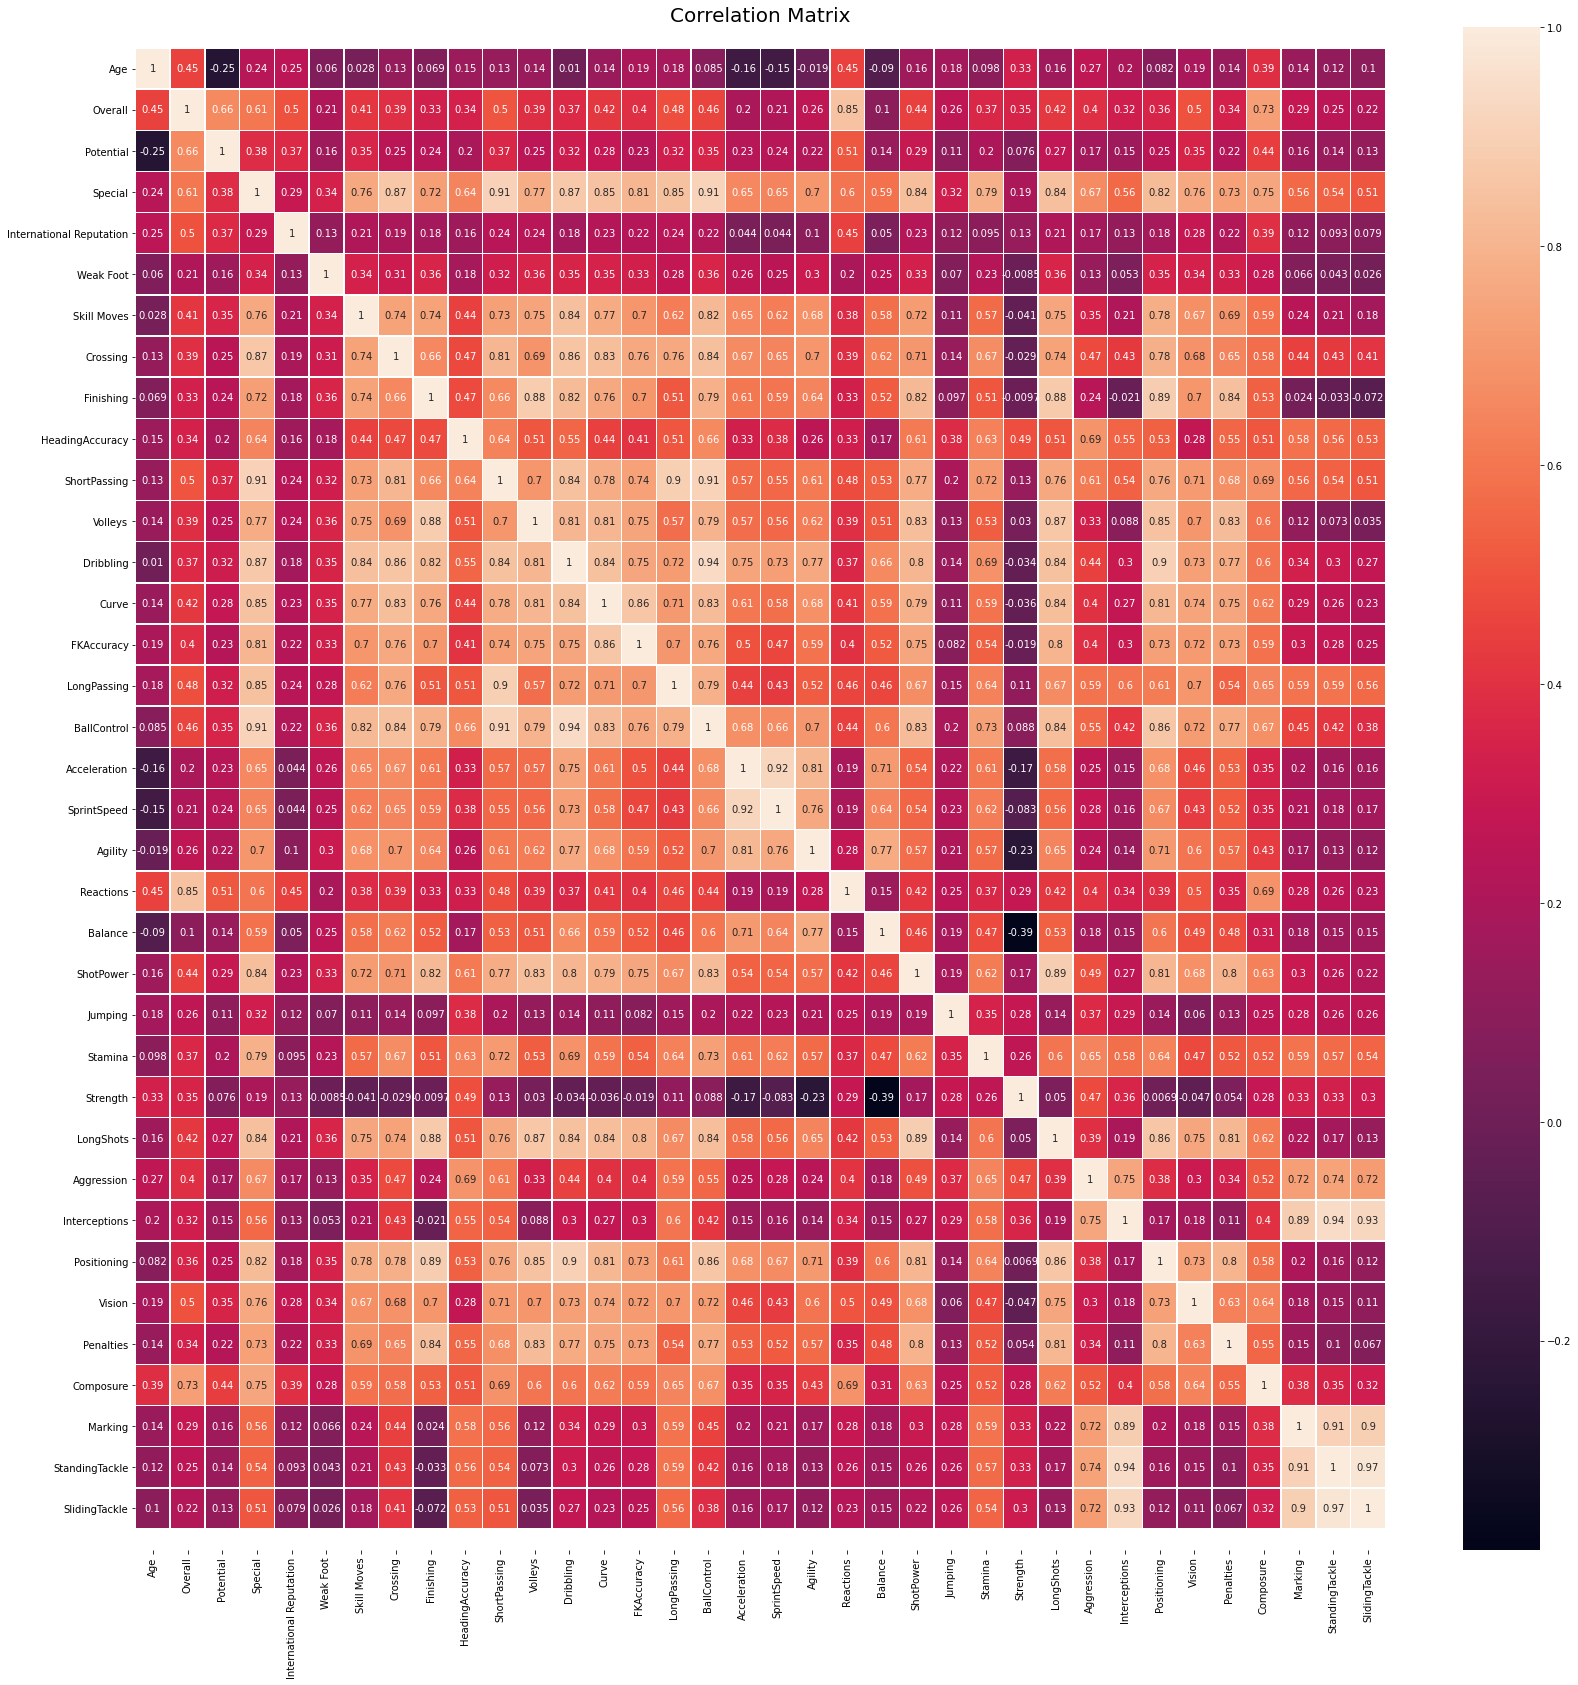

In [7]:
#Dropping unnecessary columns for creating a heatmap
hm = dataset.drop(['Unnamed: 0','ID','Jersey Number','Contract Valid Until','GKDiving',
                  'GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(28,28))
#Plotting heat map
g=sns.heatmap(hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.show()

In [8]:
# Dropping all null values from the feature columns
subset_values=['Reactions','Composure','International Reputation','ShortPassing','Vision','LongPassing','BallControl']
dataset = dataset.dropna(axis=0, subset = subset_values)
dataset.shape

(18159, 89)

In [9]:
# Splitting the dataset into features and outcome variable(Overall)
y = dataset.iloc[:,7].values
y.shape

(18159,)

In [10]:
features = ['Age','Special','Reactions','Composure','Potential','International Reputation','ShortPassing'
            ,'Vision','LongPassing','BallControl']
# Picking up the top ten most useful features based on the above heatmap 
x = dataset[features].values
print(x)

[[  31. 2202.   95. ...   94.   87.   96.]
 [  33. 2228.   96. ...   82.   77.   94.]
 [  26. 2143.   94. ...   87.   78.   95.]
 ...
 [  16. 1189.   47. ...   43.   28.   44.]
 [  17. 1228.   21. ...   47.   32.   52.]
 [  16. 1321.   51. ...   49.   44.   51.]]


In [11]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Multiple Linear Regression

In [12]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression()

In [13]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [14]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.8983024312518929


## Polynomial Regression

In [15]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))

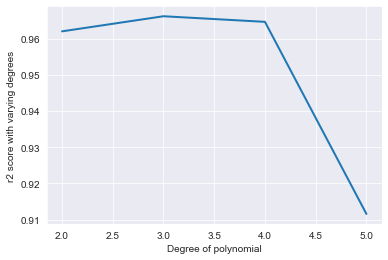

In [16]:
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [19]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9661664826377754


In [20]:
print(poly_regressor.coef_)

[ 2.46921371e-05  1.08293073e+00  5.93635285e-02 -1.43940602e+00
 -1.43714396e-01  3.41793531e-01  3.11434787e+01 -3.50556882e-01
  3.34677515e-01 -7.58113846e-02 -9.60673731e-01 -4.37873201e-03
 -2.76879479e-03  4.66802106e-02  5.58010028e-03  3.26933776e-02
 -1.56176843e+00  2.84807947e-02 -3.15406087e-03 -3.94380446e-03
  1.37858675e-02  1.30603168e-05 -8.46631021e-05  6.41879573e-04
 -1.29679491e-03 -9.41669884e-05  6.12530455e-04 -1.01150436e-03
  2.23264464e-05  1.86909218e-04  2.25284689e-03 -5.12526722e-03
  3.28246864e-02 -4.31216417e-01 -1.01884585e-02  4.02237789e-03
  6.06122258e-03  3.77945437e-04  3.98996311e-03 -3.66781754e-03
  1.64337037e-01  1.98994733e-03 -8.51950034e-03  2.59913964e-03
 -1.07714159e-02 -1.27805182e-02  2.58322282e-01  7.43077760e-03
 -1.23787300e-03 -3.17839410e-03  1.71135406e-02  1.52606798e+00
 -1.12388809e-01 -8.33242102e-02  9.64263078e-03 -1.20341030e-01
 -6.69842165e-03 -6.86286777e-03 -1.51394787e-03  4.47809307e-03
  1.31279902e-02 -5.80517

## K-Nearest Neighbors Regression

In [53]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,21,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))

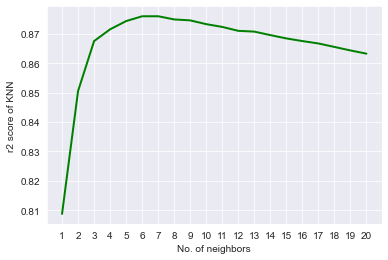

In [54]:
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()

In [55]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=6)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.8759537325603887


## Decision Tree Regression

In [56]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [57]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [58]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9250099890661768


## Random Forest Regression

In [59]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))

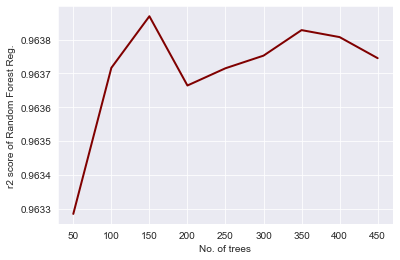

In [60]:
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()

In [61]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=150,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9638692379354221


## Linear Support Vector Regression

In [62]:
# Feature Scaling for SVR
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

In [63]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(kernel='linear')

In [64]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [65]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.8969934561231581


## Non-linear Support Vector Regression

In [66]:
## Training the Non-linear SVR model on the training set
## rbf - Radial Basis Function
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR()

In [67]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [68]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.9683138000378212


## XGBoost Regression

In [70]:
## Use this command first time to install py-xgboost before using this regression
## conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    libxgboost-1.3.3           |       hd77b12b_0         1.3 MB
    py-xgboost-1.3.3           |   py38haa95532_0         139 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libxgboost-1.3.3-hd77b12b_0
  py-xgboost         pkgs/main/win-64::py-xgboost-1.3.3-py38haa95532_0




libxgboost-1.3.3     | 1.3 MB    |            |   0% 
libxgboost-1.3.3     | 1.3 MB    | 1          |   1% 
li

In [71]:
## Applying the XGBoost Regression model on the training set
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
## Predicting test results
y_pred = regressor_xgb.predict(x_test)

In [73]:
## Calculating r2 score
r2_xgb = r2_score(y_test,y_pred)
print(r2_xgb)

0.963802217454702


## Comparing the r2 scores of different models

In [74]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR','XGBoost Reg.']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR,r2_xgb]

for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=2)

In [75]:
print(mylist)

[89.83, 96.62, 87.6, 92.5, 96.39, 89.7, 96.83, 96.38]


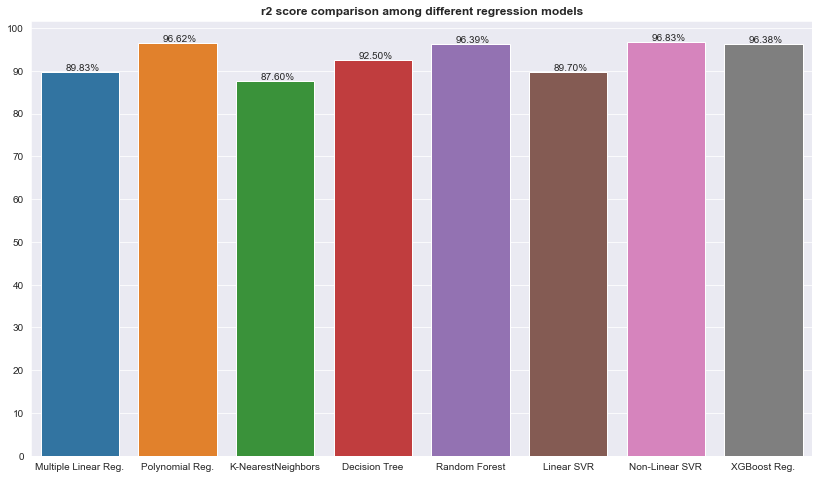

In [76]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x +0.25, y + height + 0.25))
plt.show()